In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bills = pd.read_csv('DTB3.csv')
bills.head()

,observation_date,DTB3
0,2016-06-30,0.26
1,2016-07-01,0.27
2,2016-07-04,NaN
3,2016-07-05,0.28
4,2016-07-06,0.27


In [3]:
# Assuming bills is your DataFrame
bills['observation_date'] = pd.to_datetime(bills['observation_date'])
bills.set_index('observation_date', inplace=True)

bills_monthly = bills.resample('M').last()

# Rename index format to add 'ME'
bills_monthly.index = bills_monthly.index.strftime('%Y-%m') + 'ME'

# If you want dates back as a column
bills_monthly = bills_monthly.reset_index()

print(bills_monthly.head())


  observation_date  DTB3
0        2016-06ME  0.26
1        2016-07ME  0.27
2        2016-08ME  0.33
3        2016-09ME  0.28
4        2016-10ME  0.34


In [4]:
maturity = pd.read_csv('wam_index.csv')
maturity.head()

,Month,Weighted Avg Maturity
0,2016-07-01,29.257053
1,2016-08-01,34.917873
2,2016-09-01,41.687256
3,2016-10-01,41.190374
4,2016-11-01,47.418204


In [5]:
import pandas as pd

# Step 1: Clean and normalize dates

# For bills_monthly (e.g., '2016-07ME' → '2016-07')
bills_monthly['Month'] = bills_monthly['observation_date'].str[:7]
bills_monthly['Month'] = pd.to_datetime(bills_monthly['Month'])

# For maturity (e.g., '2016-07-01' → '2016-07')
maturity['Month'] = pd.to_datetime(maturity['Month'])
maturity['Month'] = maturity['Month'].dt.to_period('M').dt.to_timestamp()

# Step 2: Merge
combined = pd.merge(bills_monthly, maturity, on='Month', how='inner')

# Now you have a combined dataframe with:
# - Month
# - DTB3 (T-Bill yield)
# - Weighted Avg Maturity


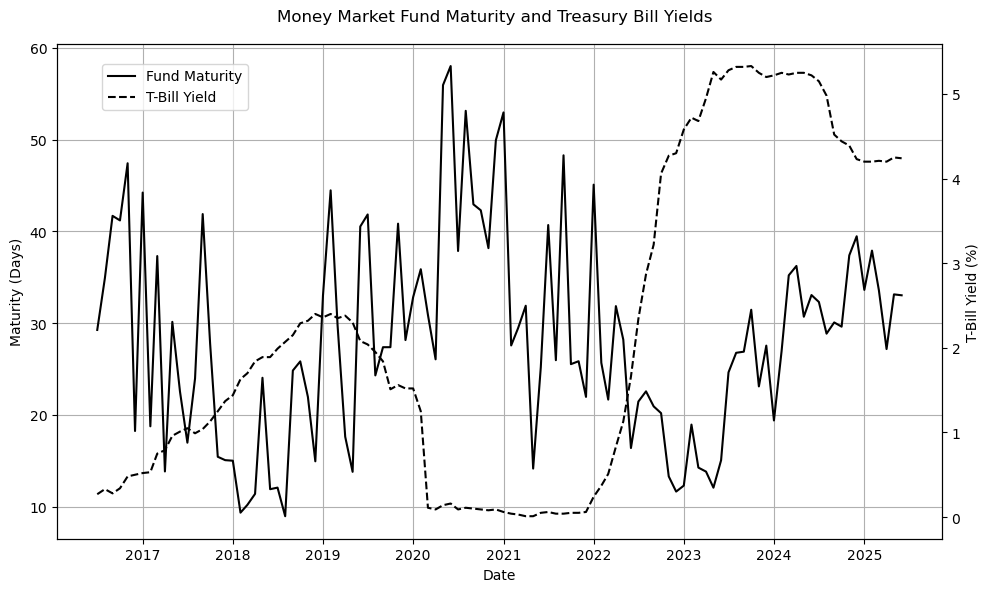

In [6]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot weighted average maturity (solid line)
line1, = ax1.plot(combined['Month'], combined['Weighted Avg Maturity'], color='black', label='Fund Maturity')
ax1.set_ylabel('Maturity (Days)', color='black')
ax1.set_xlabel('Date')
ax1.grid(True)

# Plot T-bill yield (dashed line)
ax2 = ax1.twinx()
line2, = ax2.plot(combined['Month'], combined['DTB3'], color='black', linestyle='--', label='T-Bill Yield')
ax2.set_ylabel('T-Bill Yield (%)', color='black')

# Combine legends from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Title and layout
fig.suptitle('Money Market Fund Maturity and Treasury Bill Yields')
fig.tight_layout()
plt.show()
